<a href="https://colab.research.google.com/github/Preranakh/DeepLearningProjects_Udemy/blob/main/Tweet_Analysis(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout,LSTM
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
a=files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv


In [6]:
data=pd.read_csv("Corona_NLP_test.csv")

In [7]:
data['Sentiment']=LabelEncoder().fit_transform(data['Sentiment'])
data=data.dropna(axis=1)
data.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
0,1,44953,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...,4
2,3,44955,02-03-2020,Find out how you can protect yourself and love...,1
3,4,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,2
4,5,44957,03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [8]:
x=data.drop('Sentiment',axis=1)
y=data['Sentiment'].values
y=y.reshape(-1,1)

In [9]:
x,y

(      UserName  ...                                      OriginalTweet
 0            1  ...  TRENDING: New Yorkers encounter empty supermar...
 1            2  ...  When I couldn't find hand sanitizer at Fred Me...
 2            3  ...  Find out how you can protect yourself and love...
 3            4  ...  #Panic buying hits #NewYork City as anxious sh...
 4            5  ...  #toiletpaper #dunnypaper #coronavirus #coronav...
 ...        ...  ...                                                ...
 3793      3794  ...  Meanwhile In A Supermarket in Israel -- People...
 3794      3795  ...  Did you panic buy a lot of non-perishable item...
 3795      3796  ...  Asst Prof of Economics @cconces was on @NBCPhi...
 3796      3797  ...  Gov need to do somethings instead of biar je r...
 3797      3798  ...  I and @ForestandPaper members are committed to...
 
 [3798 rows x 4 columns], array([[0],
        [4],
        [1],
        ...,
        [3],
        [0],
        [1]]))

In [10]:
nltk.download('stopwords')
message=x.copy()
message.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
ps=PorterStemmer()
corpus=[]
for i in range(len(x)):
  review=re.sub('[^a-zA-Z]',' ',message['OriginalTweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

voc_size=50000
one_hot_r=[one_hot(word,voc_size) for word in corpus]

sent_length=30
input=pad_sequences(one_hot_r,padding='pre',maxlen=sent_length)

final_input=np.array(input)
final_output=np.array(y)

x_train, x_test, y_train, y_test = train_test_split(final_input,final_output, test_size=0.33, random_state=42)
x_train.shape

(2544, 30)

In [16]:
from keras.utils.vis_utils import plot_model

In [17]:
dim=40
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(80))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train,y_train,batch_size=50,epochs=300,validation_data=(x_test,y_test))



Epoch 1/300
51/51 [==============================] - 5s 66ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 2/300
51/51 [==============================] - 3s 58ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 3/300
51/51 [==============================] - 3s 55ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 4/300
51/51 [==============================] - 3s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 5/300
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 6/300
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1521 - val_loss: 0.0000e+00 - val_accuracy: 0.1691
Epoch 7/300
51/51 [==============================] - 3s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1

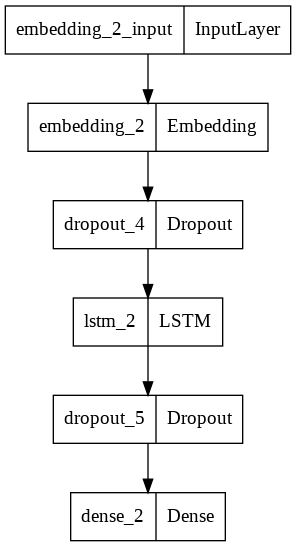

In [19]:
plot_model(model)

In [18]:
a=model.predict(x_test) 
y_pred=np.argmax(a,axis=1)

val=metrics.accuracy_score(y_test,y_pred)
print("accuracy is =",str(val*100)+" %")

accuracy is = 16.188197767145134 %
